# Гипергеометрическое распределение

**Обозначение:** HG($D, N, n$) <br>
**Параметры:**
- $D\in{0,1,2,\dots}$ - размер фракции "успехов" в популяции
- $n\in{0,1,2,\dots}$ - требуемый размер выборки
- $N\in{0,1,2\dots}$ - размер генеральной совокупности

**Носитель:** $k\in{0,1,2,\dots}$ <br>
**Функция вероятности:** $$\Pr(X=k) = \frac{C^D_k \cdot C^{N-D}_{n-k}}{C^N_n}$$ <br>
**Интуиция:** гипергеометрическое распределение описывает вероятность выпадения $k$ успехов в серии из $n$ попыток **без замены**, при этом выборка размером $n$ берётся из популяции **конечного размера** $N$. <br>
В противоположность этому, биномиальное распределение описывает вероятность выпадения $k$ успехов с заменой. Другими словами, биномиальное распределение работает со словом длины n, составленным из алфавита {0, 1}, и возвращает вероятность нахождения $k$ букв "1" в этом слове. Гипергеометрическое распределение возвращает вероятность вытаскивания 4 красных шариков в серии из 5 попыток, при том что в корзинке лежат 6 красных и 14 жёлтых шариков. То есть в биномиальном распределениии при составлении слова буквы вытаскиваются из "бездонного" алфавита {0, 1}, а в гипергеометрическом - из корзинки с конечным числом шариков, вытаскивание каждого из которых несёт информацию о вероятностях выпадения других шариков.

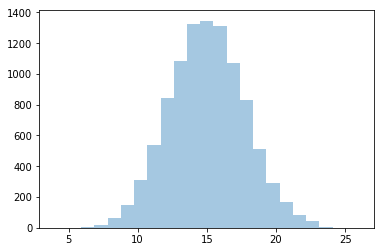

In [64]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

D = 60  # в корзинке лежит 60 красных шариков ("успехов")
N = 200 # всего в корзинке лежит 200 шариков
n = 50  # вытаскиваем из корзинки 50 шариков без замены
NUM_EXPERIMENTS = 10000

# Сформулируем единичный опыт "вытаскивание одного шарика из корзинки размером N с D успехами":
def trial(D, N):
    return True if np.random.rand() < D/N else False

# Начнём проводить серию из n единичных опытов, причём после каждого единичного опыта будем
# корректировать количество шариков, оставшихся в корзинке: N должен уменьшаться на 1,
# и D тоже уменьшаться на 1 если выпал успех, и оставаться преждним, если выпала неудача.
def series_of_n_trials(D_size, N_size, n):
    """Возвращает количество выпавших успехов в серии из n единичных опытов"""
    successes = 0
    for _ in range(n):
        if trial(D_size, N_size):
            successes += 1
            D_size -= 1
            N_size -= 1
        else:
            N_size -= 1
    return successes

# Чтобы получить распределение, будем проводить серии из n экспериментов в целом NUM_EXPERIMENTS раз,
# а затем рассмотрим получившееся распределение количества успехов на графике.
outcomes_list = [series_of_n_trials(D, N, n) for i in range(NUM_EXPERIMENTS)]

# Отобразим получившееся распределение на графике:    
plt.clf()
sns.distplot(outcomes_list, kde = False, bins = np.unique(outcomes_list).shape[0])
plt.show()

Проверим конкретно серию из $n=5$ единичных экспериментов: вытаскивание 1 шарика из корзинки в 20 шариков, где 6 шариков - "успех", и 14 шариков - "неудача". Нас интересует вероятность выпадения 4 успехов в серии из 5 опытов, теоретическое значение равно:

$$\Pr(X=k) = \frac{C^6_4 \cdot C^{14}_{1}}{C^{20}_5} = 0.01354$$

In [83]:
NUM_EXPERIMENTS = 1000000

successes = 0
for _ in range(NUM_EXPERIMENTS):
    if series_of_n_trials(6, 20, 5) == 4:
        successes += 1

print('Экспериментальное значение:', successes / NUM_EXPERIMENTS)
print('Теоретическое значение:     0.01354')

Экспериментальное значение: 0.01357
Теоретическое значение:     0.01354
